# Recover transits with *Deep-Transit*

In [1]:
import lightkurve as lk
search_result = lk.search_lightcurve('8081239', mission='Kepler', exptime='long')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr008081239,0.0
1,Kepler Quarter 02,2009,Kepler,1800,kplr008081239,0.0
2,Kepler Quarter 03,2009,Kepler,1800,kplr008081239,0.0
3,Kepler Quarter 04,2010,Kepler,1800,kplr008081239,0.0
4,Kepler Quarter 05,2010,Kepler,1800,kplr008081239,0.0
5,Kepler Quarter 06,2010,Kepler,1800,kplr008081239,0.0
6,Kepler Quarter 07,2010,Kepler,1800,kplr008081239,0.0
7,Kepler Quarter 08,2011,Kepler,1800,kplr008081239,0.0
8,Kepler Quarter 09,2011,Kepler,1800,kplr008081239,0.0


In [2]:
lc = search_result.download_all().stitch()

In [3]:
lc = lc[(lc.time.value>300)&(lc.time.value<400)]

findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found

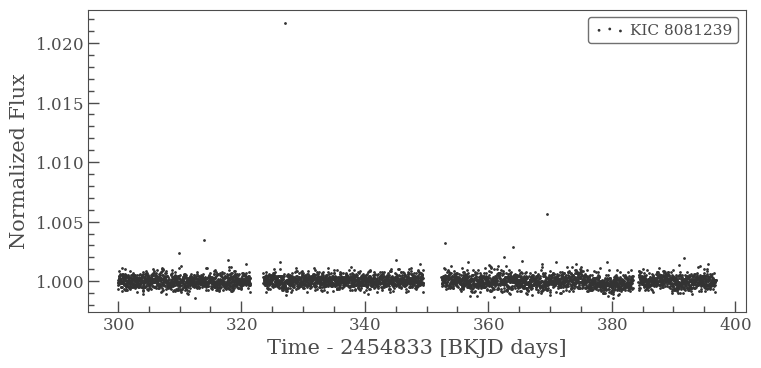

In [4]:
lc.scatter()

In [5]:
import dt_lightcurve as dt

In [6]:
dt_obj = dt.DeepTransit(lc, is_flatten=False)

In [7]:
bboxes = dt_obj.transit_detection('model/Model_Kepler.pth', batch_size=3)

  0%|          | 0/4 [00:00<?, ?it/s]

Loading Model: model/Model_Kepler.pth


6it [00:09,  1.62s/it]                       


In [8]:
import matplotlib.pyplot as plt

In [9]:
flatten_lc = dt.detrend_light_curve(lc)

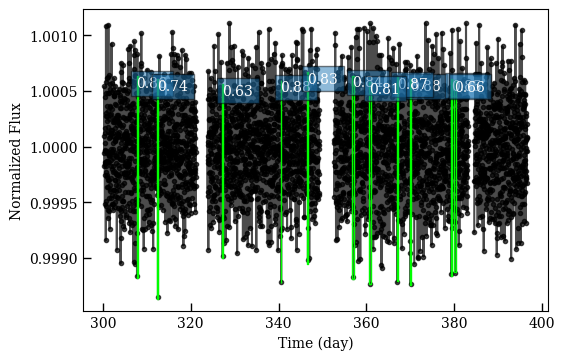

In [15]:
fig, ax = plt.subplots(dpi=100)
ax = dt.plot_lc_with_bboxes(flatten_lc, bboxes, ax=ax, color='k', marker='.', alpha=0.7)
# ax.set_xlim([375, 395])

# Astronimical Test

## Compared with 